In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
try:
    import japanize_matplotlib
except:
    pass
import pandas as pd
pd.set_option('display.precision', 2)  # 小数点以下の表示桁
pd.set_option('display.max_rows', 20)  # 表示する行数
%precision 3

'%.3f'

# データの整理

## データの種類と尺度

データには**質的データ**と**量的データ**の2種類がある．
また，これらは，データをどのように数値に対応させるかという規則（**尺度**）によってさらに細かく分類できる．

### 質的データ

まず，性別（男，女），天気（晴，曇，雨，雪）など，他と区別することだけができるデータを**カテゴリカルデータ**と呼ぶ．
カテゴリカルデータは，「男を１，女を２」などとすれば数値で表すことができるが，その数値には他と区別するという以上の意味はない．
このように数値を割り当てる規則は**名義尺度**と呼ばれる．
カテゴリカルデータに対しては数をカウントすること（度数や最頻値の計算）を除いて一切の計算が許されない．

一方，スポーツの順位（1位，2位，3位）や満足度（3：満足，2：普通，1：不満）のように大小関係や前後関係が決まるデータを順序データと呼ぶ．
順序データを作るためには，マラソンのタイムなどを大小関係だけが区別できるように数値化すれば良い．
このように数値を割り当てる規則は**順序尺度**と呼ばれる．
順序データに対しては大小関係を比較すること（最小値，最大値，中央値の計算，$ >, = $などの演算）が許される．

以上のカテゴリカルデータと順序データを合わせて**質的データ**と呼ぶ．

### 量的データ

値の大小関係に加えて値の差にも意味があるようなデータを**間隔データ**と呼ぶ．
間隔データの代表例は，摂氏・華氏温度や時刻（時間ではない）である．
例えば，摂氏温度は水の融点を0℃，沸点を100℃としてその間を等分することで数値を定める．
また，時刻は時間の流れの中の1点を便宜的に0とし，そこからの相対的な間隔によって数値を割り当てる．
このように数値を割り当てる規則は**間隔尺度**と呼ばれる．
間隔データでは，値同士の大小関係と差に意味はあるが，値同士の比に意味はない．
実際，4℃と8℃を比較して後者の方が4℃暑いということはできるが，2倍暑いなどということはできない．
なお，間隔データは大小関係の比較に加えて値同士の加減（$+,\ -$の演算）が許される．
```{margin} 摂氏温度について
摂氏温度を比率尺度である絶対温度で表すと，4℃は277.15K，8℃は281.15Kであり，その比は2倍ではない
```

最後に，値の大小関係と値の差に加えて，値同士の比にも意味があるようなデータを**比率（比例）データ**と呼ぶ．
比率データの代表例は身長，体重，年齢などである．
例えば，身長50cmと200cmには「値の大小関係」があり，「値の差」も150cmと意味がある．
また，「後者は前者の4倍」であると解釈でき，比が意味を持つ．
K（ケルビン）で表される絶対温度も比率データの例である．
実際，絶対温度において，1Kと2Kではある量（原子や分子の運動の激しさ）が実際に2倍になっているので値同士の比に意味がある．
比率データは値同士の加減乗除が全て許される．

間隔尺度と比率尺度が見分けづらい場合は，「0の値が相対的な意味しか持たない」場合が間隔尺度，「0の値が絶対的な意味を持つ」（ある量が実際に無いことを意味する）場合が比率尺度と考えると良い．
例えば，摂氏温度における0は便宜的に決めたものであるが，絶対温度における0は原子や分子の運動がゼロであるという絶対的な意味を持つため，前者は間隔尺度，後者は比率尺度である．

以上の間隔データと比率データを合わせて**量的データ**と呼ぶ．

## 量的データの要約

これ以降，量的データだけを対象とする．

### 五数要約
15個の量的データがあるとする．
これを（左から右に向かって）小さい順に並べたとき，{numref}`fig:5number`のように4等分に分割できる．
このとき，アを**最小値**，イを**第1四分位数**，ウを**中央値（第2四分位数）**，エを**第3四分位数**，オを**最大値**と呼ぶ．
また，データを小さい順に並べたとき，左半分のデータを下位データ，右半分のデータを上位データと呼ぶ．
ただし，データの数が奇数個の場合は中央値を除いて下位・上位に分ける方法を採用する（中央値を両方に含める場合もある）．
このとき，第1四分位数$ Q_{1} $は下位データの中央値，第3四分位数$ Q_{3} $は上位データの中央値である．
以上のようにデータのばらつきを5つの数で表す方法を**五数要約**と呼ぶ．
また，第3四分位数と第1四分位数の差$ Q_{3}-Q_{1} $を**四分位範囲**と呼ぶ．
なお，四分位は英語でquartileなので，各四分位数（イ，ウ，エ）を$ Q_{1},\ Q_{2},\ Q_{3} $と表すことが多い．

```{figure} 5number.png
---
height: 100px
name: fig:5number
---
15個の量的データを（左から右に向かって）小さい順に並べた例．
```

五数要約の求め方はデータの数が奇数個の場合と偶数個の場合で異なる．
以下に例を示す．

**例）データが9個（奇数個）の場合**

データの数が奇数個の場合は最小値，最大値，中央値が自動的に定まる．
一方，中央値を除いて下位データと上位データに分けると，それぞれが偶数個になる．
この場合，下位データ，上位データそれぞれの中央にくる2つの値の平均値を第1四分位数，第3四分位数とする．

```
2 3 5 5 | 6 | 8 10 12 15
```
この場合，中央値は$ Q_{2}=6 $となるので，これを除いて下位データと上位データに分ける．
第1四分位数は$ Q_{1}=(3+5)/2=4 $，第3四分位数は$ Q_{3}=(10+12)/2=11 $と求まる．
四分位範囲は$ Q_{3}-Q_{1}=11-4=7 $である．

**例）データが10個（偶数個）の場合**

データの数が偶数個の場合は中央にくる2つの値の平均値を中央値とする．
下位データと上位データはそれぞれ奇数個に分かれるので，第1四分位数，第3四分位数は自動的に求まる．

```
2 2 5 6 7 | 9 10 13 14 18
```
この場合，中央値は$ Q_{2}=(7+9)/2=8 $となる．
また，第1四分位数は$ Q_{1}=5 $，第3四分位数は$ Q_{3}=13 $と求まる．
四分位範囲は$ Q_{3}-Q_{1}=13-5=8 $である．

**Pythonでの実装**

NumPyの`np.percentile`関数を用いると，五数要約を簡単に求めることができる．
自分で実装する場合には，データの並び替えやデータの個数が奇数個・偶数個による場合分けなどが必要となる（Pythonの良い練習問題なのでやってみると良い）．

In [88]:
# データの作成
x1 = [15, 20, 23, 20, 19, 21, 20, 18, 23, 18, 19, 20, 22]
x2 = [7, 6, 9, 6, 10, 13, 12, 10, 14, 18, 7, 10, 13, 22]

In [89]:
# 最小値，第1四分位数，中央値，第3四分位数，最大値
np.percentile(x1, q=[0, 25, 50, 75, 100])

array([15., 19., 20., 21., 23.])

In [90]:
# 最小値，第1四分位数，中央値，第3四分位数，最大値
np.percentile(x2, q=[0, 25, 50, 75, 100])

array([ 6. ,  7.5, 10. , 13. , 22. ])

### 箱ひげ図

五数要約の結果は{numref}`fig:boxplot`のようなグラフによって可視化できる．
これを**箱ひげ図**と呼ぶ．
箱ひげ図は以下の手順によって描くのが一般的である（これを**テューキーの方式**と呼ぶ）．

1. データの第1四分位数から第3四分位数の間に箱を描く．
2. 中央値の位置に線を引く．
3. 箱から四分位範囲（箱の長さ）の1.5倍を超えて離れた点を**外れ値**と見なしてを白丸で描く．
4. 外れ値ではないものの最大値と最小値から箱まで線（ひげ）を引く．

なお，外れ値を表示しない簡便な描き方もある．
また，90度回転させて横に描くことも多い．

```{figure} box_plot.png
---
height: 300px
name: fig:boxplot
---
テューキーの方式による箱ひげ図の例
```

**Pythonでの実装**

Pythonで箱ひげ図を描くには，Matplotlibの`boxplot`関数を用いれば良い．

In [91]:
# データの作成
x1 = [15, 20, 23, 20, 19, 21, 20, 18, 23, 18, 19, 20, 22]
x2 = [7, 6, 9, 6, 10, 13, 12, 10, 14, 18, 7, 10, 13, 22]

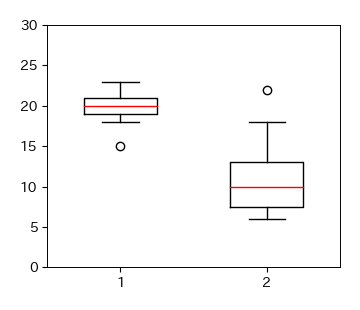

In [92]:
fig, ax = plt.subplots(figsize=(3.5, 3))
ret = ax.boxplot([x1, x2], whis=1.5, widths=0.5, vert=True)

ax.set_ylim(0, 30);  # 縦軸の表示範囲
ax.set_yticks([0, 5, 10, 15, 20, 25, 30]);  # 縦軸の表示目盛り
fig.savefig('./box_ex.png', bbox_inches="tight",\
            pad_inches=0.2, transparent=True, dpi=300) # 保存

### ヒストグラム

データの分布の傾向（どの値がどのくらいあるか）を表す方法として，箱ひげ図ではデータを要約しすぎてしまい適切にその特徴を表せないことがある．
そこで，より詳細に分布の傾向を捉える方法として**度数分布**がある．
度数分布とは，ある値のデータがいくつあるかを示したもので，以下のように作成する．

- 値を0以上10未満，10以上20未満などのいくつかの区間（**階級，ビン**）に分ける
- それぞれの階級に含まれるデータの個数（**度数**）を数える
- 階級と度数の関係を可視化する

度数分布を可視化する方法には，階級と度数の関係を表で表した**度数分布表**と横軸に階級の代表値（**階級値**），縦軸に度数をとった**ヒストグラム**がある．
ヒストグラムの横軸には各階級の最小と最大を表示する場合と，階級値として階級の最小値や中央値を示す場合がある．
また，度数の代わりに相対度数（度数/データ数）や累積相対度数（最小の階級からの相対度数の和）を取ることもある．
相対度数はその階級に含まれるデータが全体に占める割合，累積相対度数はその階級以下のデータが全体に占める割合を表す．

なお，度数分布を可視化する上で，階級（ビン）の幅は大きすぎても細かすぎても分かりにくくなる．
そこで，一般的な目安として，階級数は標本の大きさ（サンプルサイズ）$ N $の平方根$ \sqrt{N} $程度が良いとされている．
例えば，100個のデータを含む場合は10程度の階級が望ましい．
また，$ 1 + \log_{2} N $という公式も存在し，これを**スタージェスの公式**と呼ぶ．

```{figure} fdt_data.png
---
height: 80px
name: fig:fdt_data
---
量的データ$X$
```

```{figure} fdt_ex.png
---
height: 250px
name: fig:fdt
---
度数分布表の例
```

```{figure} hist_ex.png
---
height: 300px
name: fig:fdt
---
ヒストグラムの例
```

**Pythonでの実装**

具体例として，ここではIris Dataset {cite}`Fisher1936`に含まれるアヤメのがく片の長さ（Sepal Length），がく片の幅（Sepal Width），花弁の長さ（Petal Length），花弁の幅（Petal Width）のデータを用いる．
まずは[Iris Datasetをダウンロード](https://drive.google.com/uc?export=download&id=1dmRM6SiafHEkCH_c7G0KHmt_IISqKrWN)して作業フォルダに保存し，以下のようにPandasのDataFrame形式で読み込む：

In [51]:
# CSVファイルをPandasのデータフレーム形式で読み込み
Iris = pd.read_csv('./Iris.csv', usecols=[1, 2, 3, 4])
Iris.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
Iris

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


このデータに対してスタージェスの公式を適用すると以下のようになる．

In [26]:
# ビンの個数（スタージェスの公式）
bn = 1+np.log2(len(Iris))
bn

8.229

以下はアヤメのがく片の長さ（Sepal Length）のデータに対する度数分布表である．
ここでは，各階級の中央値を階級値としており，度数の他に，相対度数と相対度数を足し合わせた累積相対度数も示している．
例えば，階級4の相対度数は0.207なので，6.1以上6.55以下のデータが全体の20%程度存在することが分かる．
また，階級4の累積相対度数は0.8なので，6.55以下のデータが全体の80%を占めることが分かる．

In [29]:
# がく片の長さに対する度数分布表
f, x = np.histogram(Iris['Sepal Length'], bins=int(bn), density=0)
df = pd.DataFrame({'階級の最小値': x[:-1],
                   '階級の最大値': x[1:],
                   '階級値': 0.5*(x[1:]+x[:-1]),
                   '度数': f,
                   '相対度数': f/len(Iris),
                   '累積相対度数': np.cumsum(f/len(Iris))
                   })
df.to_csv('./Iris_fdt.csv', index=False, encoding="utf_8_sig")
df

,階級の最小値,階級の最大値,階級値,度数,相対度数,累積相対度数
0,4.30,4.75,4.53,11,0.07,0.07
1,4.75,5.20,4.97,30,0.20,0.27
2,5.20,5.65,5.43,24,0.16,0.43
3,5.65,6.10,5.88,24,0.16,0.59
4,6.10,6.55,6.33,31,0.21,0.80
5,6.55,7.00,6.78,17,0.11,0.91
6,7.00,7.45,7.22,7,0.05,0.96
7,7.45,7.90,7.68,6,0.04,1.00


次に，アヤメのがく片の長さ，がく片の幅，花弁の長さ，花弁の幅のヒストグラムを描く．
Pythonでヒストグラムを描画するにはMatplotlibの`hist`関数を用いる．
以下はアヤメのがく片の長さ，がく片の幅，花弁の長さ，花弁の幅について，一度にヒストグラムを描画する例である．

ヒストグラムの中でデータが集中している部分が山のようになっているとき，山が１つの場合には**単峰性**，2つの場合には**双峰性**，それ以上の場合には**多峰性**と呼ぶ．
Irisデータの場合，がく片（Sepal）のヒストグラムは単峰性，花弁（Petal）のヒストグラムは双峰性である．
特に，多峰性のヒストグラムの場合には箱ひげ図によって可視化するとデータを要約しすぎてしまうため，適切にその特徴を表すことができない．
この他にも，値の小さなところにデータが集中していて大きな値のところに少数のデータがあるとき，「右に裾を引いている」という．

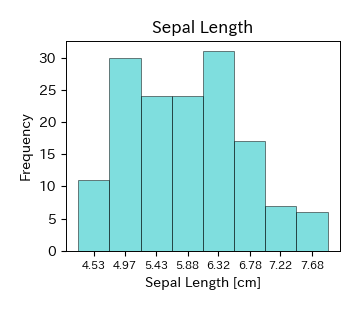

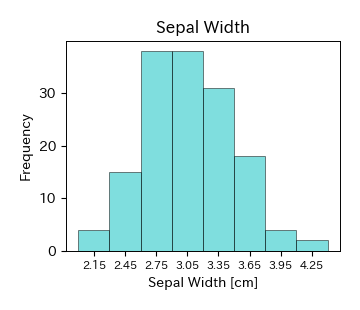

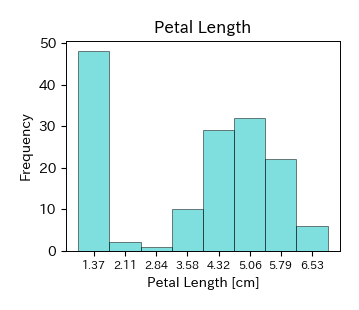

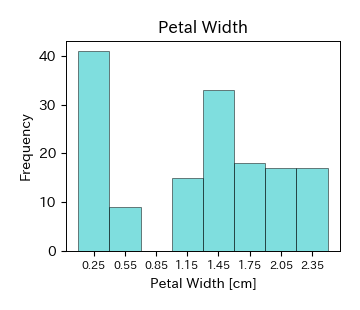

In [30]:
# ヒストグラムの描画と保存
for i in Iris.columns:
    fig, ax = plt.subplots(figsize=(3.5, 3), dpi=100)
    x = ax.hist(Iris[i], # データ
                bins=int(bn), # 階級数
                histtype='bar',  # ヒストグラムの種類
                color='c', ec='k', alpha=0.5  # 縦棒の色，透明度
               )[1]
    x2 = np.round(0.5*(x[1:]+x[:-1]), 2)  # 横軸に表示する階級値（中央値）
    
    ax.set_title(i)  # グラフのタイトル
    ax.set_xticks(x2) # 横軸の目盛り
    ax.set_xticklabels(x2, fontsize=8) # 横軸の目盛り
    ax.set_xlabel(i+' [cm]')  # 横軸のラベル
    ax.set_ylabel('Frequency') # 縦軸のラベル
    fig.savefig('./Iris_hist_%s.png'%i, bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

## 実例：夏の避暑地の気候の特徴〜夏の避暑地が快適な理由は？〜

日本への外国人旅行者は近年急増しているが，一方で，日本人の国内旅行者の動向を月別に見ると，以下のように月ごとに変動している．
特に，5月や8月は国内旅行者の数が突出して多くなっているが，これはゴールデンウィークや夏休みを利用して旅行する人が多いからである．

In [2]:
# 2015年の月別国内旅行者数
df = pd.DataFrame({'month': np.arange(12)+1,
                   'number': [4315, 3620, 5331, 4456, 6322, 4693, 4458, 7177, 5707, 4647, 4794, 4952]})

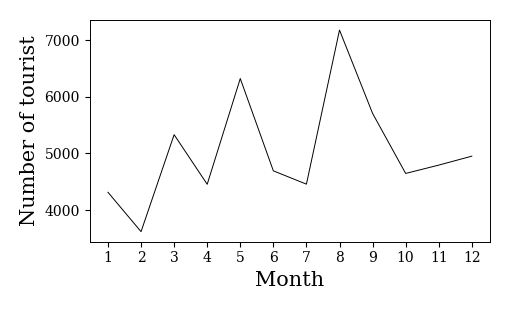

In [3]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(df['month'], df['number'])
ax.set_xticks(np.arange(12)+1)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Number of tourist', fontsize=15)
fig.savefig('./tourist_month.png', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

### STEP 1: Problem
ある高校に通う5人の高校生は，2015年の夏休みにそれぞれ別の都市で過ごした．
以下は日本の各都市についての気候に関する意見をまとめたものである．

- 軽井沢は東京と比べて過ごしやすかった
- 東京も今年は涼しい日もあったけど，すごく暑い日が多かった
- 熊谷は東京以上に暑かった
- 沖縄は暑かったけど，慣れてしまえば逆に過ごしやすかった
- 札幌は過ごしやすかったけど，大阪は東京と同じように暑かった

それぞれの場所で，本当に暑さに違いはあったのだろうか？
特に，日本では，夏に避暑地を訪れる人が多いが，避暑地にはどのような特徴があるのだろうか？

### STEP2: Plan
[気象庁のHP](http://www.data.jma.go.jp/gmd/risk/obsdl/index.php) には1日の平均気温，最高気温，最低気温，湿度などのデータが掲載されている．
ここでは，1日の最高気温，最低気温，湿度のデータを収集する．

収集したデータは五数要約や箱ひげ図によって傾向を調べる．
また，夏の蒸し暑さを定量化した指標である**不快指数**を計算し，各都市の特徴を調べる．
不快指数は気温を$ t $，湿度を$ H $とすると

$$
	不快指数=0.81t + 0.01H(0.99t-14.3)+46.3
$$

によって求められる．
一般に，不快指数が75になると人口の約1割が不快を感じ，85になると全員が不快になる［三省堂編集所，大辞林，三省堂(1988)］．

### STEP3: Data

**実習：データの加工**
- [気象庁のHP](http://www.data.jma.go.jp/gmd/risk/obsdl/index.php)から2015年8月の各地点（東京，軽井沢，熊谷，石垣島，札幌，大阪）の日平均気温，日最高気温，日最低気温，日平均相対湿度のデータをcsv形式でダウンロードせよ．
- ダウンロードしたデータをPythonで解析しやすいように加工せよ．
  - [加工済みデータのダウンロード](https://drive.google.com/uc?export=download&id=1p62JY9i2OUwDMP_S_x4FQ0Gn0do-J-qH)（まずは自分でやってみること）
- 加工したデータを読み込め．

In [4]:
# csvデータの読み込み
Tave = pd.read_csv('./temp_ave.csv')
Tmax = pd.read_csv('./temp_max.csv')
Tmin = pd.read_csv('./temp_min.csv')
H = pd.read_csv('./humidity.csv')

### STEP4: Analysis

**実習：最高気温**
- 各都市の最高気温のデータに対し，五数要約と四分位範囲を求めよ．
- 五数要約の結果から，各都市に対して並行箱ひげ図を作成せよ．

In [36]:
Tmax

,Tokyo,Karuizawa,Kumagaya,Ishigakijima,Sapporo,Osaka
0,35.3,31.1,38.3,33.1,27.3,37.5
1,35.1,30.2,37.5,31.5,29.0,36.4
2,35.0,29.8,36.6,31.3,27.8,36.2
3,35.1,30.3,37.5,31.7,31.9,36.3
4,35.2,30.4,38.0,33.3,34.5,36.7
...,...,...,...,...,...,...
26,27.3,24.3,29.4,31.1,22.1,32.2
27,22.9,21.6,24.3,30.8,23.0,33.5
28,21.0,17.8,22.6,31.2,24.9,30.9
29,22.5,16.9,21.3,30.9,23.5,27.4


In [48]:
# 五数要約
Tmax.describe()

,Tokyo,Karuizawa,Kumagaya,Ishigakijima,Sapporo,Osaka
count,31.00,31.00,31.00,31.00,31.00,31.00
mean,30.54,25.19,31.43,31.60,26.43,33.16
std,4.78,4.62,5.53,1.29,2.82,2.99
min,21.00,15.90,20.70,28.70,21.70,26.60
25%,27.65,21.70,27.25,30.90,24.55,31.65
50%,31.90,27.00,33.80,31.50,26.50,33.10
75%,34.35,29.15,35.15,32.75,27.80,36.25
max,37.70,31.10,38.60,33.60,34.50,38.00


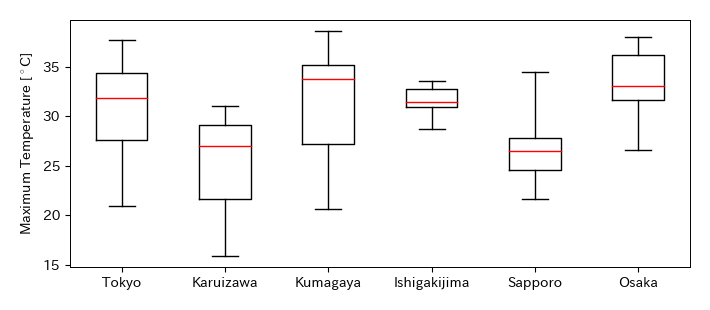

In [37]:
# 並行箱ひげ図（最高気温）
fig, ax = plt.subplots(figsize=(7, 3))
ret = ax.boxplot(Tmax.values, labels=Tmax.columns, whis=100, widths=0.5, vert=True)
ax.set_ylabel('Maximum Temperature [$^\circ$C]')
fig.savefig('./boxplot_max-temp.png', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

**実習：最低気温**
- 各地点の最低気温のデータについて，並行箱ひげ図を作成せよ
- 各地点について，熱帯夜（最低気温が25℃以上の夜）の日数を求めよ

In [38]:
Tmin

,Tokyo,Karuizawa,Kumagaya,Ishigakijima,Sapporo,Osaka
0,26.6,16.7,26.5,27.1,21.1,27.5
1,26.3,16.2,24.4,28.2,19.3,28.1
2,26.1,15.9,23.1,27.4,19.5,27.9
3,26.5,17.2,26.5,25.4,22.5,27.8
4,25.7,17.5,26.0,26.7,24.0,27.6
...,...,...,...,...,...,...
26,20.2,15.3,20.4,26.1,18.3,23.8
27,19.9,15.0,20.1,26.7,17.8,23.5
28,19.1,14.9,19.6,27.6,16.7,23.6
29,20.3,15.6,20.0,27.4,15.3,23.3


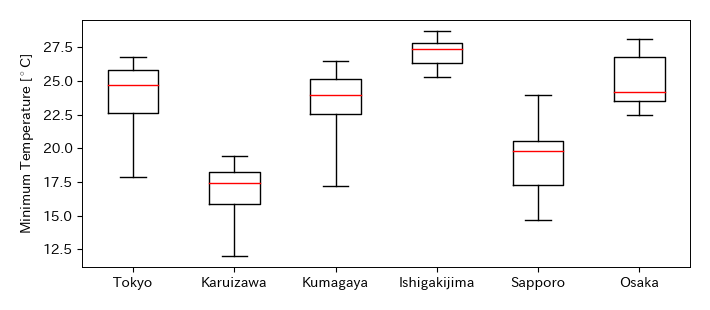

In [39]:
# 並行箱ひげ図（最低気温）
fig, ax = plt.subplots(figsize=(7, 3))
ret = ax.boxplot(Tmin.values, labels=Tmax.columns, whis=100, widths=0.5, vert=True)
ax.set_ylabel('Minimum Temperature [$^\circ$C]')
fig.savefig('./boxplot_min-temp.png', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

In [40]:
# 熱帯夜の日数
(Tmin >= 25).sum(axis=0)

Tokyo           13
Karuizawa        0
Kumagaya         9
Ishigakijima    31
Sapporo          0
Osaka           13
dtype: int64

**実習：不快指数**
- 6地点の2015年8月1日から31日までの不快指数を計算せよ
- 各地点の不快指数のデータについて，並行箱ひげ図を作成せよ

In [8]:
# 不快指数
DI = 0.81*Tave + 0.01*H*(0.99*Tave-14.3)+46.3
DI

,Tokyo,Karuizawa,Kumagaya,Ishigakijima,Sapporo,Osaka
0,83.09,72.96,82.50,81.23,72.01,83.03
1,81.84,69.62,79.73,81.50,71.61,82.81
2,80.93,69.58,79.58,81.03,72.68,82.02
3,81.23,70.29,81.77,80.70,76.39,82.21
4,81.52,70.90,81.43,81.22,77.56,82.60
...,...,...,...,...,...,...
26,72.76,64.61,73.15,80.39,66.31,76.60
27,69.91,62.52,70.75,81.16,65.49,77.04
28,67.89,60.62,68.87,81.21,65.84,77.03
29,69.89,60.80,69.13,81.24,66.10,75.82


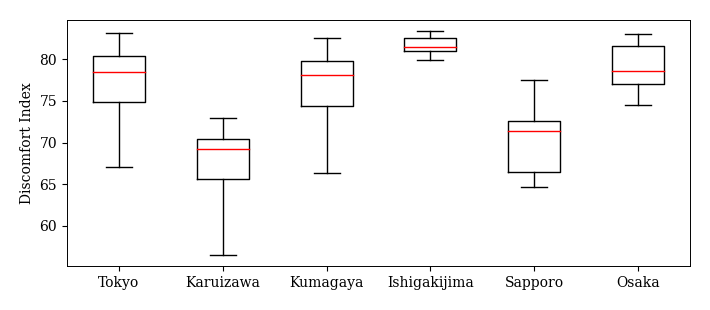

In [9]:
# 並行箱ひげ図（不快指数）
fig, ax = plt.subplots(figsize=(7, 3))
ret = ax.boxplot(DI.values, labels=DI.columns, whis=100, widths=0.5, vert=True)
ax.set_ylabel('Discomfort Index')
fig.savefig('./boxplot_di.png', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

（参考）湿度の並行箱ひげ図

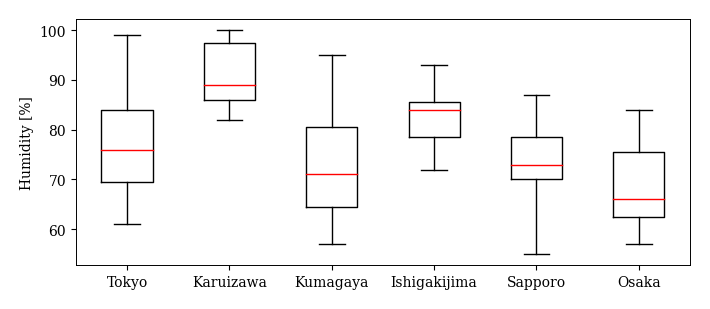

In [10]:
# 並行箱ひげ図（湿度）
fig, ax = plt.subplots(figsize=(7, 3))
ret = ax.boxplot(H.values, labels=H.columns, whis=100, widths=0.5, vert=True)
ax.set_ylabel('Humidity [%]')
fig.savefig('./boxplot_humidty.png', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

### STEP 5: Conclusion

**実習：考察**
- 最高気温に対する並行箱ひげ図を基に，各地点の特徴について分かったことを次の観点からまとめよ．
    - 東京や大阪のような大都市は避暑地と比べて暑い日が多いか？
	- 避暑地として人気の高い軽井沢は高原にあるが，北海道とどのように違うか？
	- 熊谷や沖縄は暑い地域として有名だが，それぞれで違いはあるか？	 
- 熊谷は最高気温は高いが，最低気温は東京や大阪と比べて低い．なぜこのような違いが出るのか考えよ．
- 不快指数を基に，各都市の特徴をまとめよ
- 軽井沢や札幌は夏の避暑地として人気が高い．その理由をまとめよ．
- その他，分析結果を基に自由に考察せよ．